In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [5]:
data=pd.read_csv("innercity.csv")

In [6]:
data.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [7]:
data.tail()

cid         dayhours   price  room_bed  room_bath  \
21608  5137800030  20140701T000000  300000         4       2.50   
21609  8562890910  20140619T000000  320000         4       2.50   
21610  1442880160  20140627T000000  483453         4       2.75   
21611   622100130  20140917T000000  365000         2       2.00   
21612  6413600276  20150324T000000  354950         3       1.00   

       living_measure  lot_measure  ceil  coast  sight  ...  basement  \
21608            2303         3826   2.0      0      0  ...         0   
21609            3490         5000   2.0      0      0  ...         0   
21610            2790         5527   2.0      0      0  ...         0   
21611            1440        15000   1.0      0      0  ...         0   
21612             970         5922   1.5      0      0  ...         0   

       yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
21608      2006             0    98092  47.3258 -122.165              2516   
21609      2003             0    98042  47.3772 -122.127              2910   
21610      2014             0    98045  47.4827 -121.773              2620   
21611      1985             0    98072  47.7648 -122.159              1780   
21612      1949             0    98125  47.7190 -122.321              1730   

       lot_measure15  furnished  total_area  
21608           4500          0        6129  
21609           5025          0        8490  
21610           5509          0        8317  
21611          15000          0       16440  
21612           6128          0        6892  

[5 rows x 23 columns]

In [8]:
data.shape

(21613, 23)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [11]:
data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [12]:
#There are no missing values in our dataframe

In [13]:
data.describe().transpose()

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06

**Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C34987D88>,
      dtype=object)

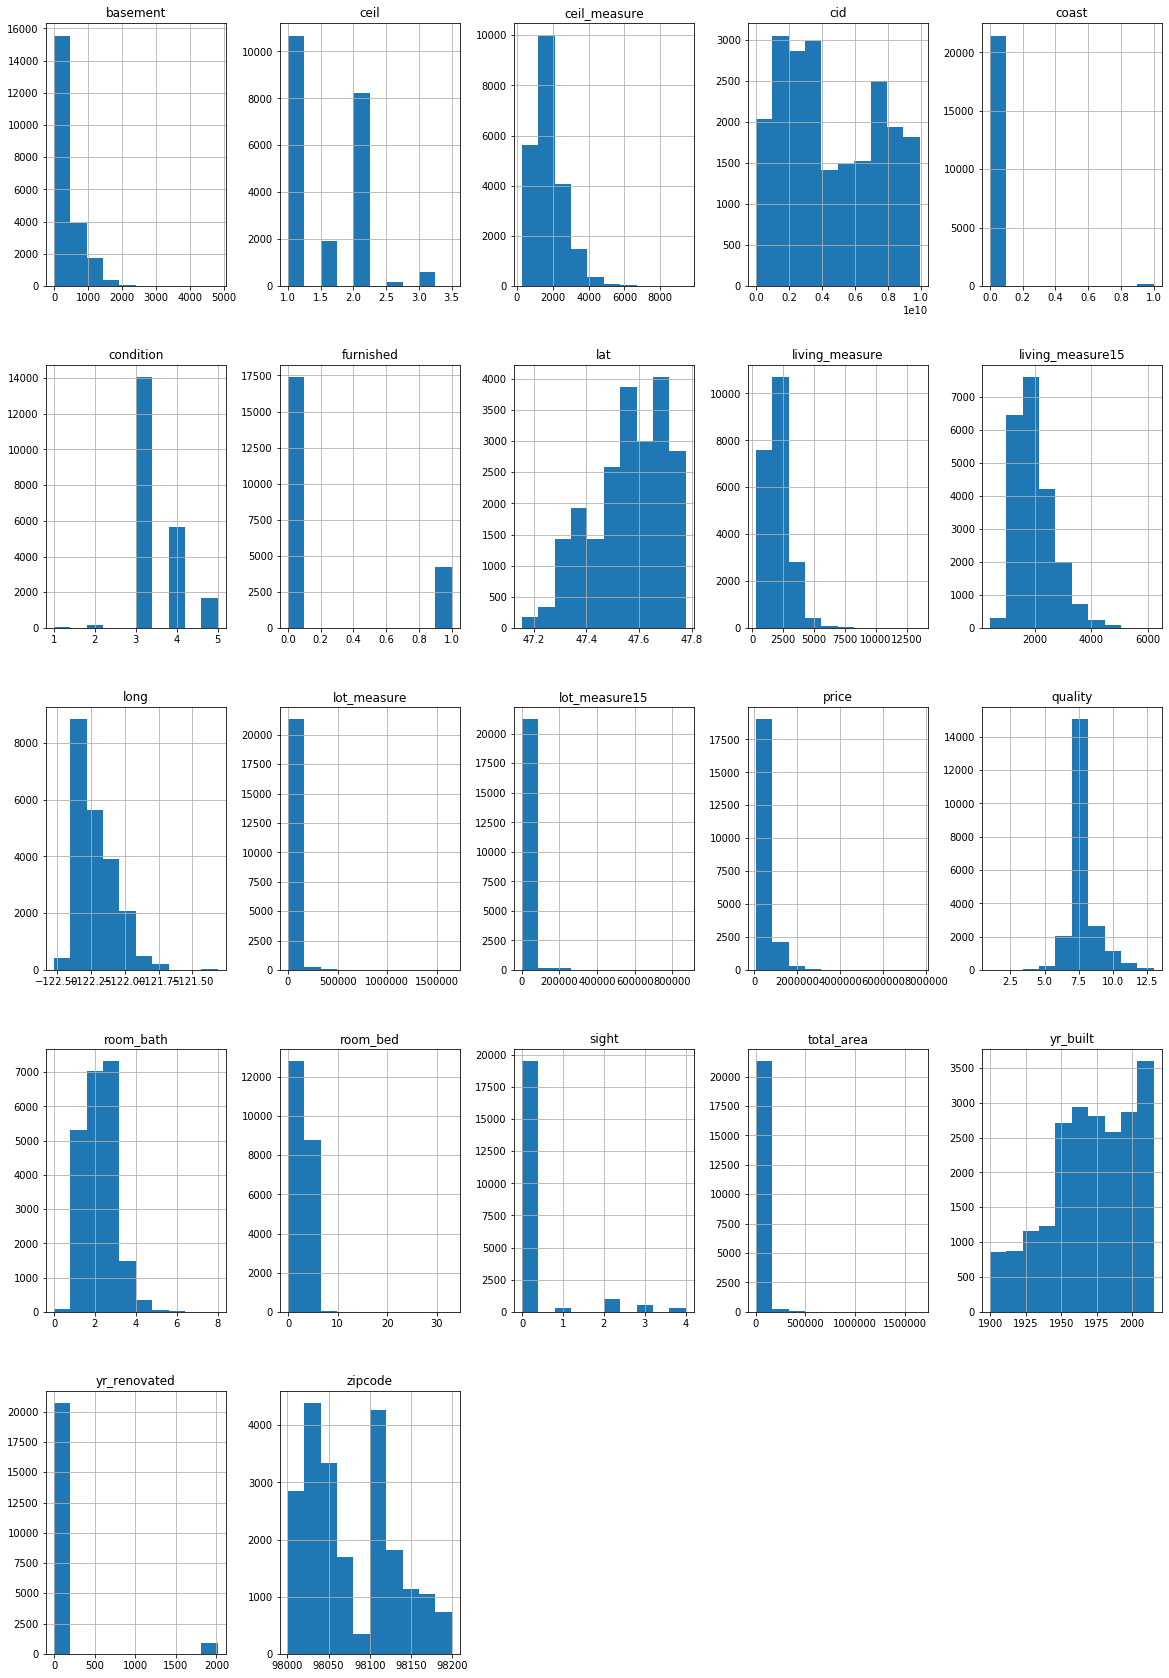

In [15]:
data.hist(figsize=(20,30))

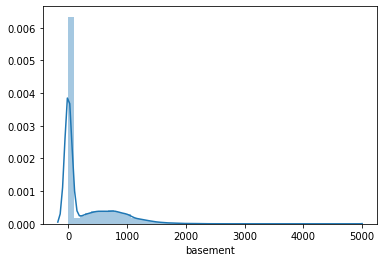

In [16]:
sns.distplot( data['basement'])

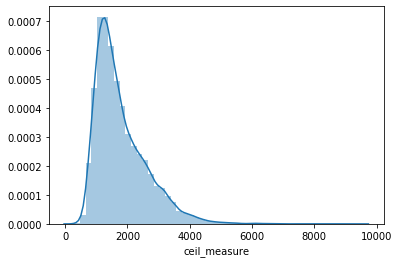

In [18]:
sns.distplot( data['ceil_measure'])

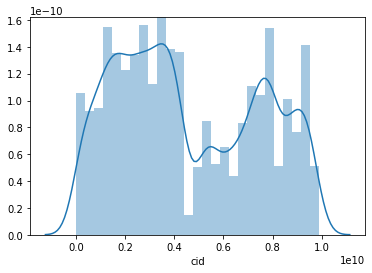

In [19]:
sns.distplot( data['cid'])

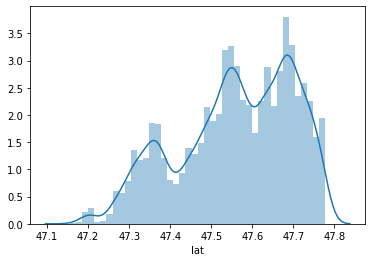

In [20]:
sns.distplot( data['lat'])

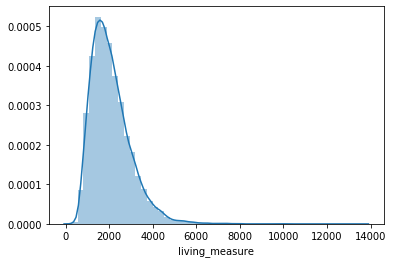

In [21]:
sns.distplot( data['living_measure'])

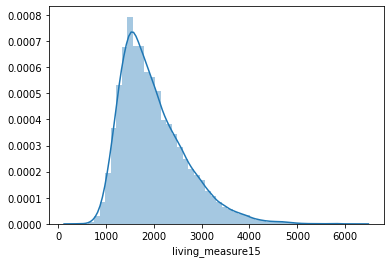

In [22]:
sns.distplot( data['living_measure15'])

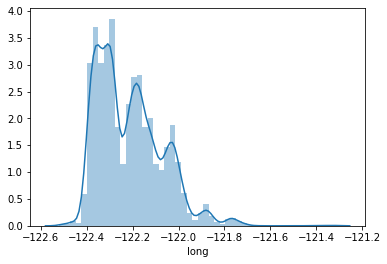

In [23]:
sns.distplot( data['long'])

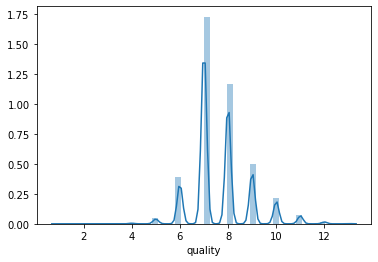

In [24]:
sns.distplot( data['quality'])

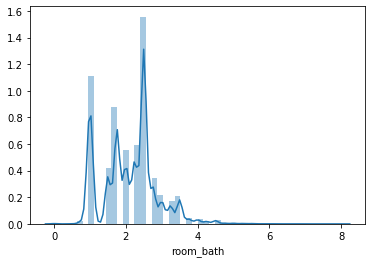

In [25]:
sns.distplot( data['room_bath'])

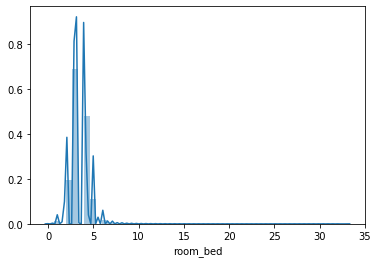

In [26]:
sns.distplot( data['room_bed'])

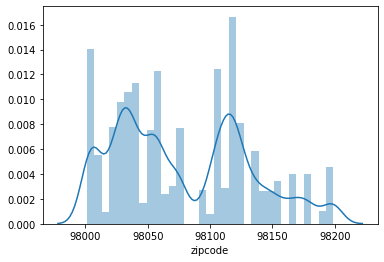

In [27]:
sns.distplot( data['zipcode'])

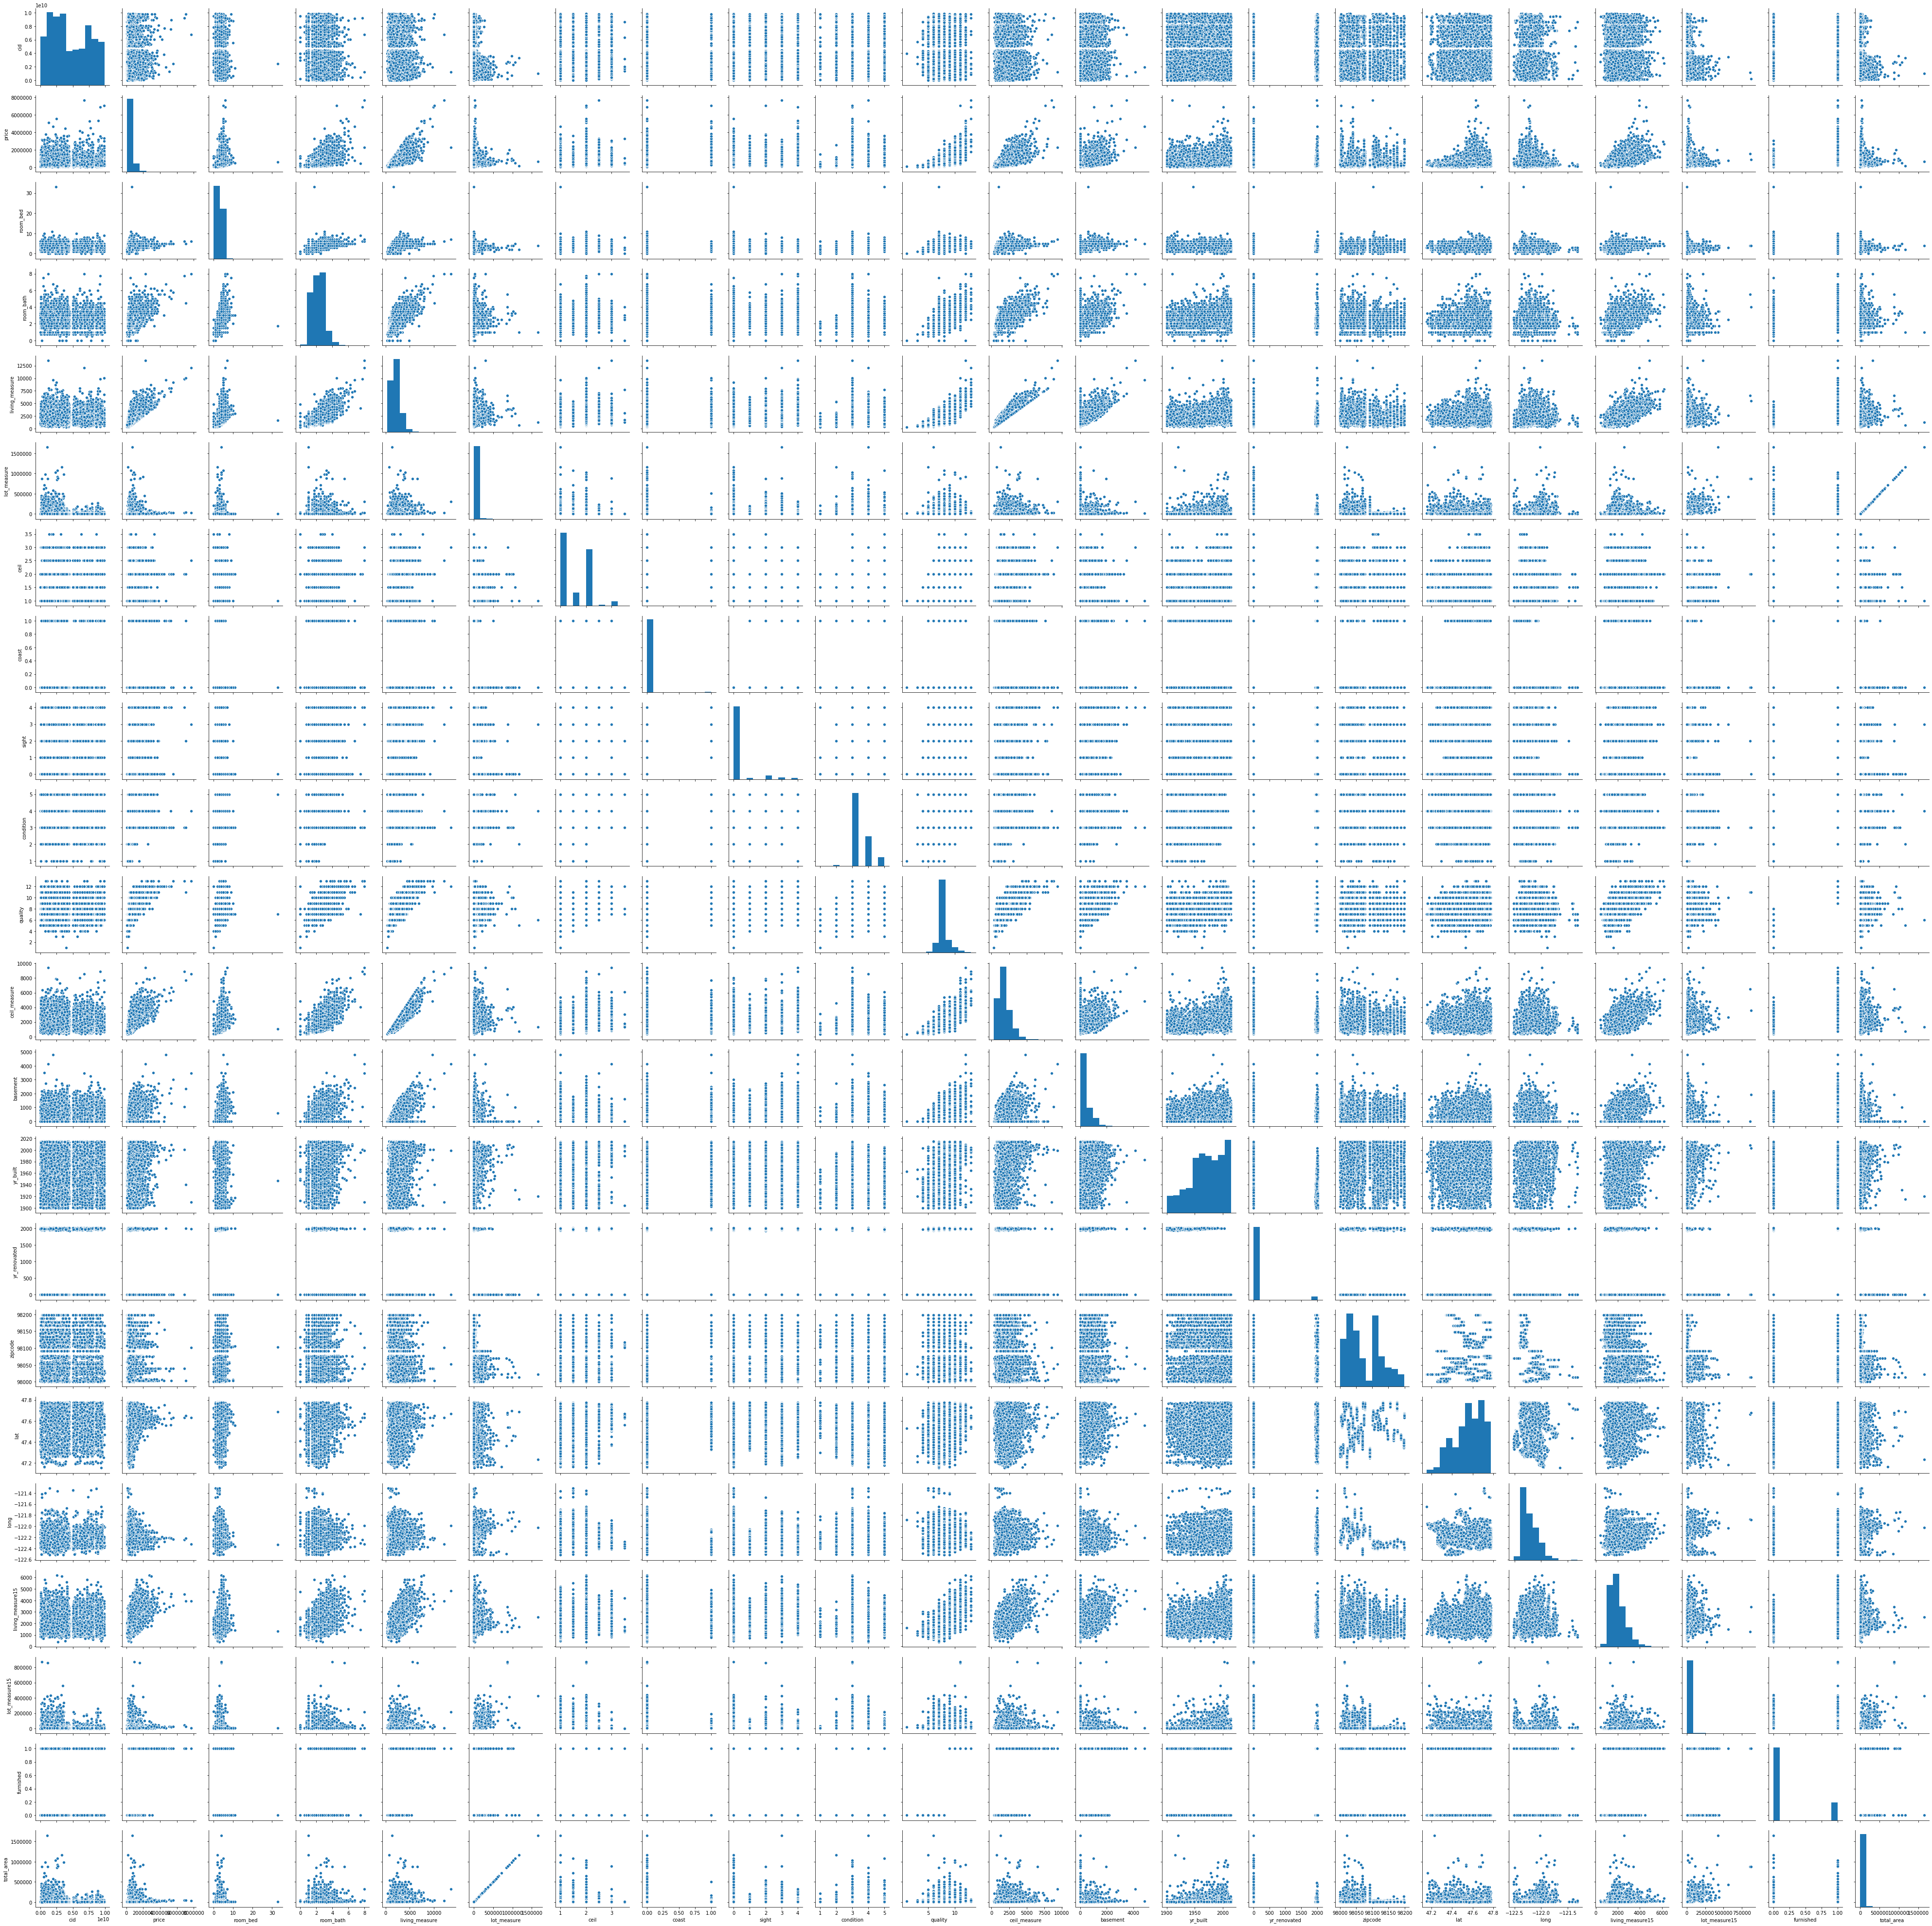

In [28]:
sns.pairplot(data)